#### StarPhenomenon, has collected sales data from 2021 to 2025 across multiple products, channels, and regions. However, the company lacks insights into the key drivers of revenue and profit, seasonal trends, and unusual sales patterns. Without these insights, it is difficult to optimize pricing, promotions, and market expansion strategies. The challenge is to perform exploratory data analysis (EDA) on this dataset to uncover hidden trends, identify growth opportunities, and align business performance with budget goals. The ultimate objective is to enable sustainable growth while minimizing risks from overdependence on specific products, regions, or channels.


## Import Libraries


In [316]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as oxl

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## Load StarPhenomenon Data

In [317]:
# Load Data
file_path = "starphenomenon_regional_sales_dataset_2021_2025.xlsx"

sheets = {
    "sales_orders": "Sales Orders",
    "customers": "Customers",
    "regions": "Regions",
    "state_region": "State Regions",
    "products": "Products",
    "budgets": "2024 Budgets",
}

dfs = {key: pd.read_excel(file_path, sheet_name=sheet) for key, sheet in sheets.items()}

# Access like this:
sales_orders_df = dfs["sales_orders"]
customers_df = dfs["customers"]
regions_df = dfs["regions"]
state_region_df = dfs["state_region"]
products_df = dfs["products"]
budgets_df = dfs["budgets"]
print("Data loaded successfully.")

Data loaded successfully.


### Quick Rows and Column Counts

In [318]:
print(f"SALES ORDERS SHAPE: {sales_orders_df.shape}")
print(f"CUSTOMERS SHAPE: {customers_df.shape}")
print(f"REGIONS SHAPE: {regions_df.shape}")
print(f"STATE REGIONS SHAPE: {state_region_df.shape}")
print(f"PRODUCTS SHAPE: {products_df.shape}")
print(f"BUDGETS SHAPE: {budgets_df.shape}")

SALES ORDERS SHAPE: (64104, 12)
CUSTOMERS SHAPE: (175, 2)
REGIONS SHAPE: (994, 15)
STATE REGIONS SHAPE: (49, 3)
PRODUCTS SHAPE: (30, 2)
BUDGETS SHAPE: (30, 2)


### Data Overview

Data Overview reveils the following issues:

The State Regions Sheet has generic column names: Column1	Column2	Column3 and what appears to be the correct headings on the second row as follows:

Column1	Column2	Column3
State Code	State	Region

In [319]:
# Data Overview

print("\nSALES ORDERS DATAFRAME HEAD:")
display(sales_orders_df.head())     
print("\nCUSTOMERS DATAFRAME HEAD:")
display(customers_df.head())
print("\nREGIONS DATAFRAME HEAD:")
display(regions_df.head())
print("\nSTATE REGIONS DATAFRAME HEAD:") # Issue with column name
display(state_region_df.head())
print("\nPRODUCTS DATAFRAME HEAD:")
display(products_df.head())
print("\nBUDGETS DATAFRAME HEAD:")
display(budgets_df.head())
print("\nSALES ORDERS DATAFRAME DESCRIPTION:")
display(sales_orders_df.describe())
print("\nCUSTOMERS DATAFRAME DESCRIPTION:")
display(customers_df.describe())
print("\nREGIONS DATAFRAME DESCRIPTION:")
display(regions_df.describe())
print("\nSTATE REGIONS DATAFRAME DESCRIPTION:")
display(state_region_df.describe())
print("\nPRODUCTS DATAFRAME DESCRIPTION:")
display(products_df.describe())
print("\nBUDGETS DATAFRAME DESCRIPTION:")
display(budgets_df.describe())
print("SALES ORDERS CUSTOMER SALES INFO:")
sales_orders_df.info()
print("\nCUSTOMERS INFO:")
customers_df.info()
print("\nREGIONS INFO:")
regions_df.info()
print("\nSTATE REGIONS INFO:")  # Issue with column name
state_region_df.info()
print("\nPRODUCTS INFO:")
products_df.info()
print("\nBUDGETS INFO:")
budgets_df.info()

# --- IGNORE ---




SALES ORDERS DATAFRAME HEAD:


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 0001068,2021-01-01,64,Export,USD,FLR025,750,10,11,924.6,10170.6,656.466
1,SO - 0001912,2021-01-01,85,Wholesale,USD,AXW291,934,13,5,3852.5,19262.5,2966.425
2,SO - 0002010,2021-01-01,109,Distributor,USD,NXH382,594,11,11,1045.2,11497.2,543.504
3,SO - 0002206,2021-01-01,81,Wholesale,USD,AXW291,82,16,8,174.2,1393.6,109.746
4,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343



CUSTOMERS DATAFRAME HEAD:


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd



REGIONS DATAFRAME HEAD:


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago



STATE REGIONS DATAFRAME HEAD:


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West



PRODUCTS DATAFRAME HEAD:


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5



BUDGETS DATAFRAME HEAD:


,Product Name,2024 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542



SALES ORDERS DATAFRAME DESCRIPTION:


,OrderDate,Customer Name Index,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
count,64104,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000
mean,2023-01-28 19:21:17.723698944,87.480064,495.086609,14.913141,8.441689,2284.380803,19280.682937,1432.083899
min,2018-02-28 00:00:00,1.000000,1.000000,1.000000,5.000000,167.500000,837.500000,68.675000
25%,2022-01-13 00:00:00,45.000000,247.000000,6.000000,6.000000,1031.800000,8019.900000,606.216000
50%,2023-01-27 00:00:00,87.000000,493.000000,15.000000,8.000000,1855.900000,14023.100000,1084.495500
75%,2024-02-13 00:00:00,130.000000,742.000000,24.000000,10.000000,3606.275000,27416.400000,2046.933750
max,2025-02-28 00:00:00,175.000000,994.000000,30.000000,12.000000,6566.000000,78711.600000,5498.556000
std,NaN,49.884946,285.645893,8.787032,2.276217,1663.598141,15429.602766,1107.705728



CUSTOMERS DATAFRAME DESCRIPTION:


,Customer Index
count,175.000000
mean,88.000000
std,50.662281
min,1.000000
25%,44.500000
50%,88.000000
75%,131.500000
max,175.000000



REGIONS DATAFRAME DESCRIPTION:


,id,latitude,longitude,area_code,population,households,median_income,land_area,water_area
count,994.000000,994.000000,994.000000,994.000000,9.940000e+02,9.940000e+02,994.000000,9.940000e+02,9.940000e+02
mean,497.500000,37.731587,-94.338524,611.596579,1.540122e+05,5.520439e+04,59307.026157,1.263807e+08,1.262435e+07
std,287.087385,5.129480,17.038950,239.899528,3.698780e+05,1.333954e+05,21478.588093,1.737591e+08,5.637069e+07
min,1.000000,21.324350,-157.847640,202.000000,5.013800e+04,0.000000e+00,0.000000,2.575149e+06,0.000000e+00
25%,249.250000,33.943055,-112.277505,406.000000,6.107600e+04,2.254050e+04,43122.500000,4.859468e+07,2.827555e+05
50%,497.500000,39.084735,-88.200290,626.000000,8.288550e+04,2.947000e+04,53605.000000,8.416624e+07,1.265209e+06
75%,745.750000,41.671312,-80.416375,832.000000,1.271868e+05,4.505075e+04,71645.750000,1.272178e+08,4.846485e+06
max,994.000000,48.759550,-70.255330,979.000000,8.550405e+06,3.113535e+06,149837.000000,1.935873e+09,8.521186e+08



STATE REGIONS DATAFRAME DESCRIPTION:


,Column1,Column2,Column3
count,49,49,49
unique,49,49,5
top,State Code,State,South
freq,1,1,16



PRODUCTS DATAFRAME DESCRIPTION:


,Index
count,30.000000
mean,15.500000
std,8.803408
min,1.000000
25%,8.250000
50%,15.500000
75%,22.750000
max,30.000000



BUDGETS DATAFRAME DESCRIPTION:


,2024 Budgets
count,3.000000e+01
mean,2.090009e+06
std,1.400364e+06
min,5.944716e+05
25%,9.746721e+05
50%,1.659036e+06
75%,2.983757e+06
max,5.685138e+06


SALES ORDERS CUSTOMER SALES INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 

### Initial Cleanup

In [320]:
# Cleanup State Regions DataFrame
# The State Regions Sheet has generic column names: Column1	Column2	Column3 and what appears to be the correct headings on the second row as follows:
# Column1	Column2	Column3
# State Code	State	Region

state_region_df.columns = state_region_df.iloc[0]  # Set the first row as header
state_region_df = state_region_df[1:]  # Remove the first row from the data 

state_region_df.head()


,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West
5,CO,Colorado,West


### Check for Null Values

No Null Values found

In [321]:
# Check for Null Values

print("Missing values in each DataFrame:")
display(sales_orders_df.isnull().sum())
display(customers_df.isnull().sum())
display(regions_df.isnull().sum())
display(state_region_df.isnull().sum())
display(products_df.isnull().sum())
display(budgets_df.isnull().sum())

Missing values in each DataFrame:


OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

Customer Index    0
Customer Names    0
dtype: int64

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

0
State Code    0
State         0
Region        0
dtype: int64

Index           0
Product Name    0
dtype: int64

Product Name    0
2024 Budgets    0
dtype: int64

### Joins

In [322]:
# Normalize headers (strip whitespace)
for _df in [sales_orders_df, customers_df, regions_df, state_region_df, products_df, budgets_df]:
    _df.columns = _df.columns.astype(str).str.strip()

# Repair State Regions header if it was read with generic column names
if {'Column1','Column2','Column3'}.issubset(set(state_region_df.columns)):
    hdr = state_region_df.iloc[0].astype(str).str.strip().values
    state_region_df = state_region_df.iloc[1:].copy()
    state_region_df.columns = hdr
state_region_df.columns = state_region_df.columns.astype(str).str.strip()

# Merge with Customers
merge_df = sales_orders_df.merge(
    customers_df,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# Merge with Products
merge_df = merge_df.merge(
    products_df,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# Merge with Regions
merge_df = merge_df.merge(
    regions_df,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# Merge with State Regions
merge_df = merge_df.merge(
    state_region_df[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# Merge with Budgets
merge_df = merge_df.merge(
    budgets_df,
    how='left',
    on='Product Name'
)

### Clean Up Redundant Columns

In [323]:
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
    # add any auto-generated cols you don't need
]
merge_df = merge_df.drop(columns=cols_to_drop, errors='ignore')

merge_df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2024 Budgets
0,SO - 0001068,2021-01-01,64,Export,USD,FLR025,750,10,11,924.6,...,-73.19552,631,336113,101387,86864,268844871,153259682,America/New York,Northeast,864331.624
1,SO - 0001912,2021-01-01,85,Wholesale,USD,AXW291,934,13,5,3852.5,...,-111.92966,385,66648,16748,94183,57533764,228038,America/Denver,West,3720639.645
2,SO - 0002010,2021-01-01,109,Distributor,USD,NXH382,594,11,11,1045.2,...,-84.55928,517,115056,48414,35563,101329851,1640233,America/Detroit,Midwest,1230458.484
3,SO - 0002206,2021-01-01,81,Wholesale,USD,AXW291,82,16,8,174.2,...,-117.29198,760,62930,23465,95149,48722319,3050086,America/Los Angeles,West,2062061.144
4,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231


### Convert all columns to lower case

In [324]:
# Convert all column names to lowercase for consistency and easier access
merge_df.columns = merge_df.columns.str.lower()

# Display the updated list of column names
merge_df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2024 budgets'], dtype=object)

### Drop not needed columns and rename for clarity for example use snake_case

In [325]:
# Drop not needed columns and rename for clarity for example use snake_case

cols_to_keep = [
    "ordernumber",
    "orderdate",
    "customer names",
    "product name",
    "channel",
    "order quantity",
    "unit price",
    "line total",
    "total unit cost",
    "state_code",
    "state",
    "region",
    "latitude",
    "longitude",
    "2024 budgets"
]

# Keep only relevant columns
merge_df = merge_df[cols_to_keep]
merge_df.head()

# Rename for clarity and consistency
merge_df = merge_df.rename(columns={
    'ordernumber'      : 'order_number',    # unique order identifier
    'orderdate'        : 'order_date',      # date of the order
    'customer names'   : 'customer_name',   # customer who placed the order
    'product name'     : 'product_name',    # name of the product sold
    'channel'          : 'sales_channel',   # sales channel (e.g., Online
    'order quantity'   : 'quantity',        # number of units sold
    'unit price'       : 'unit_price',      # price per unit
    'line total'       : 'revenue',         # total revenue for the line item
    'total unit cost'  : 'cost',           # total cost for the line item
    'state_code'       : 'state',          # state abbreviation
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # US region (e.g., West)
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2024 budgets'     : 'budget'          # budget for 2024
})

# Parse date and add time parts
merge_df['order_date'] = pd.to_datetime(merge_df['order_date'], errors='coerce')
merge_df['year'] = merge_df['order_date'].dt.year
merge_df['quarter'] = merge_df['order_date'].dt.to_period('Q').astype(str)
merge_df['month'] = merge_df['order_date'].dt.month

merge_df.info()
# Display the cleaned DataFrame structure
merge_df.head()
#merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   product_name   64104 non-null  object        
 4   sales_channel  64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         64104 non-null  float64       
 15  year           6410

,order_number,order_date,customer_name,product_name,sales_channel,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,year,quarter,month
0,SO - 0001068,2021-01-01,Fatz Group,Product 10,Export,11,924.6,10170.6,656.466,NY,New York,Northeast,40.71258,-73.19552,864331.624,2021,2021Q1,1
1,SO - 0001912,2021-01-01,Lazzy Group,Product 13,Wholesale,5,3852.5,19262.5,2966.425,UT,Utah,West,40.56217,-111.92966,3720639.645,2021,2021Q1,1
2,SO - 0002010,2021-01-01,WOCKHARDT Group,Product 11,Distributor,11,1045.2,11497.2,543.504,MI,Michigan,Midwest,42.71434,-84.55928,1230458.484,2021,2021Q1,1
3,SO - 0002206,2021-01-01,General Company,Product 16,Wholesale,8,174.2,1393.6,109.746,CA,California,West,33.03699,-117.29198,2062061.144,2021,2021Q1,1
4,SO - 000225,2021-01-01,Rhynoodle Ltd,Product 27,Wholesale,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231,2021,2021Q1,1


### Budget is only for 2024

In [326]:
# Keep budget only on 2024 orders (your columns after rename)
merge_df['budget'] = pd.to_numeric(merge_df.get('budget'), errors='coerce')
merge_df.loc[merge_df['year'] != 2024, 'budget'] = pd.NA


# 2024 slice
df2024 = merge_df[merge_df['year'] == 2024].copy()

# Avoid double counting: one budget per product
prod_budget = df2024[['product_name','budget']].dropna().drop_duplicates('product_name')
prod_actual = df2024.groupby('product_name', as_index=False)['revenue'].sum().rename(columns={'revenue':'actual_2024'})
prod_2024 = prod_actual.merge(prod_budget, on='product_name', how='left')
prod_2024['variance'] = prod_2024['actual_2024'] - prod_2024['budget']
display(prod_2024.head())

# Totals
print({
    'total_actual_2024': float(prod_actual['actual_2024'].sum()),
    'total_budget_2024': float(prod_budget['budget'].sum())
})


display(merge_df[merge_df['year'] == 2024].head())
display(merge_df.head())

,product_name,actual_2024,budget,variance
0,Product 1,12431340.8,3016489.209,9.414852e+06
1,Product 10,4126181.6,864331.624,3.261850e+06
2,Product 11,6104128.8,1230458.484,4.873670e+06
3,Product 12,6121582.3,1356976.996,4.764605e+06
4,Product 13,19757435.7,3720639.645,1.603680e+07


{'total_actual_2024': 293829987.4, 'total_budget_2024': 62700262.337}


,order_number,order_date,customer_name,product_name,sales_channel,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,year,quarter,month
46362,SO - 0010636,2024-01-01,Johnson Ltd,Product 1,Wholesale,6,1996.6,11979.6,1417.586,AZ,Arizona,West,32.32341,-110.99510,3016489.209,2024,2024Q1,1
46363,SO - 0001333,2024-01-01,Wordpedia Ltd,Product 11,Wholesale,6,1139.0,6834.0,489.770,CA,California,West,37.48522,-122.23635,1230458.484,2024,2024Q1,1
46364,SO - 0001822,2024-01-01,Livepath Corp,Product 18,Distributor,8,1031.8,8254.4,866.712,TX,Texas,South,32.91592,-96.54867,2309499.045,2024,2024Q1,1
46365,SO - 0002059,2024-01-01,Feednation Corp,Product 3,Wholesale,9,1018.4,9165.6,407.360,TX,Texas,South,32.58986,-96.85695,2642352.432,2024,2024Q1,1
46366,SO - 0002350,2024-01-01,Johnson Ltd,Product 13,Distributor,12,884.4,10612.8,486.420,CT,Connecticut,Northeast,41.55850,-73.03668,3720639.645,2024,2024Q1,1


,order_number,order_date,customer_name,product_name,sales_channel,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,year,quarter,month
0,SO - 0001068,2021-01-01,Fatz Group,Product 10,Export,11,924.6,10170.6,656.466,NY,New York,Northeast,40.71258,-73.19552,NaN,2021,2021Q1,1
1,SO - 0001912,2021-01-01,Lazzy Group,Product 13,Wholesale,5,3852.5,19262.5,2966.425,UT,Utah,West,40.56217,-111.92966,NaN,2021,2021Q1,1
2,SO - 0002010,2021-01-01,WOCKHARDT Group,Product 11,Distributor,11,1045.2,11497.2,543.504,MI,Michigan,Midwest,42.71434,-84.55928,NaN,2021,2021Q1,1
3,SO - 0002206,2021-01-01,General Company,Product 16,Wholesale,8,174.2,1393.6,109.746,CA,California,West,33.03699,-117.29198,NaN,2021,2021Q1,1
4,SO - 000225,2021-01-01,Rhynoodle Ltd,Product 27,Wholesale,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,2021,2021Q1,1


### Add a profit and percentage column

In [327]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as oxl
import pandas as pd


# Calculate total cost (order_quantity × total_unit_cost_per_unit)
merge_df["total_cost"] = (
    merge_df["quantity"] * merge_df["cost"]
)

# Calculate profit
merge_df["profit"] = merge_df["revenue"] - merge_df["total_cost"]

# Calculate profit margin %
merge_df["profit_margin_pct"] = (
    merge_df["profit"] / merge_df["revenue"]
) * 100

# Preview the results
merge_df[[
    "order_number", 
    "quantity", 
    "unit_price", 
    "revenue", 
    "cost", 
    "total_cost", 
    "profit", 
    "profit_margin_pct"
]].head()


,order_number,quantity,unit_price,revenue,cost,total_cost,profit,profit_margin_pct
0,SO - 0001068,11,924.6,10170.6,656.466,7221.126,2949.474,29.0
1,SO - 0001912,5,3852.5,19262.5,2966.425,14832.125,4430.375,23.0
2,SO - 0002010,11,1045.2,11497.2,543.504,5978.544,5518.656,48.0
3,SO - 0002206,8,174.2,1393.6,109.746,877.968,515.632,37.0
4,SO - 000225,6,2499.1,14994.6,1824.343,10946.058,4048.542,27.0


In [328]:
import pandas as pd

# 1) Ensure proper datetime
merge_df["order_date"] = pd.to_datetime(merge_df["order_date"], errors="coerce")

# 2) See what's outside your expected window
bad = merge_df[(merge_df["order_date"] < "2021-01-01") | (merge_df["order_date"] > "2025-12-31") | (merge_df["order_date"].isna())]
print("Rows outside 2021–2025 or NaT:", len(bad))
print(bad[["order_number","order_date"]].head(10))

# 3A) Quick fix: drop out-of-window / invalid dates
merge_df = merge_df[
    (merge_df["order_date"] >= "2021-01-01") &
    (merge_df["order_date"] <= "2025-12-31")
].copy()
merge_df = merge_df.dropna(subset=["order_date"])

# (Optional 3B) If you instead want to *correct* obvious typos like "2018"→"2021":
# merge_df.loc[merge_df["order_date"].dt.year == 2018, "order_date"] = \
#     merge_df.loc[merge_df["order_date"].dt.year == 2018, "order_date"] + pd.offsets.DateOffset(years=3)
# Use only if you KNOW they were shifted; dropping is safer otherwise.


Rows outside 2021–2025 or NaT: 1
      order_number order_date
64103  SO - 000989 2018-02-28


### Explory Data Analysis (EDA)

C:\Users\robfr\AppData\Local\Temp\ipykernel_1935364\4084690718.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_rev, x='revenue_m', y='us_region', palette=palette, ax=ax)


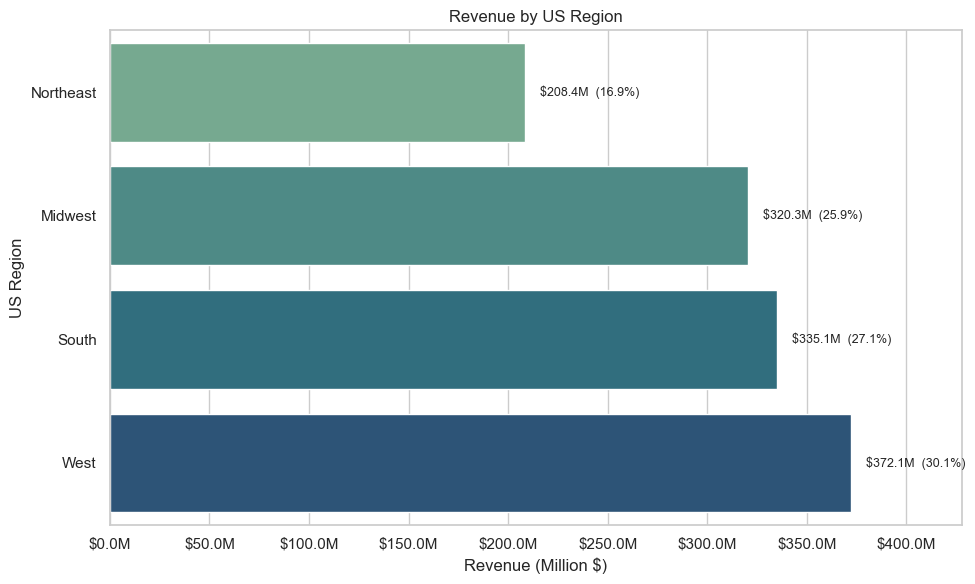

In [329]:
# Revenue by US Region

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Aggregate and prep
region_rev = (merge_df
              .assign(us_region=merge_df['us_region'].astype(str).str.strip())
              .groupby('us_region', as_index=False)['revenue'].sum()
              .dropna())
region_rev = region_rev.sort_values('revenue', ascending=True).copy()
region_rev['revenue_m'] = region_rev['revenue'] / 1e6
total_rev = float(region_rev['revenue'].sum())
region_rev['share_pct'] = 100.0 * region_rev['revenue'] / total_rev

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
palette = sns.color_palette('crest', n_colors=len(region_rev))

sns.barplot(data=region_rev, x='revenue_m', y='us_region', palette=palette, ax=ax)

# Format axis and title
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:.1f}M'))
ax.set_xlabel('Revenue (Million $)')
ax.set_ylabel('US Region')
ax.set_title('Revenue by US Region')

# Value labels ($M and share)
xmax = region_rev['revenue_m'].max() if len(region_rev) else 0
ax.set_xlim(0, xmax * 1.15 if xmax > 0 else 1)
for p, (_, row) in zip(ax.patches, region_rev.iterrows()):
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w + xmax*0.02, y, f'${w:.1f}M  ({row.share_pct:.1f}%)',
            va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

# Optional: save a slide-ready image
# fig.savefig("revenue_by_us_region.png", dpi=300, bbox_inches="tight", facecolor="white")


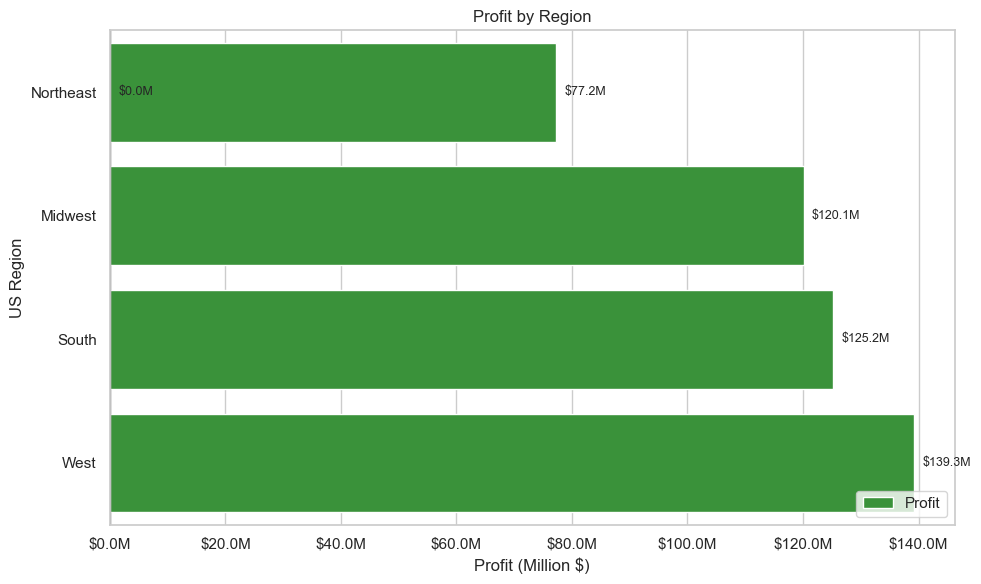

In [330]:
# Profit by Region

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd

# Aggregate profit by region
region_profit = (merge_df
                 .assign(us_region=merge_df['us_region'].astype(str).str.strip())
                 .groupby('us_region', as_index=False)['profit']
                 .sum())

# Order regions by profit (low→high so the best appears at the top)
order = region_profit.sort_values('profit', ascending=True)['us_region']

# Add sign for coloring
region_profit['sign'] = np.where(region_profit['profit'] >= 0, 'Profit', 'Loss')

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
palette = {'Profit': '#2ca02c', 'Loss': '#d62728'}

sns.barplot(
    data=region_profit,
    y='us_region', x='profit',
    order=order, hue='sign', dodge=False,
    palette=palette, ax=ax
)

# Zero line and formatting (show $ in millions)
ax.axvline(0, color='gray', lw=1)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M'))
ax.set_xlabel('Profit (Million $)')
ax.set_ylabel('US Region')
ax.set_title('Profit by Region')

# Value labels
for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w + (0.01*abs(ax.get_xlim()[1]-ax.get_xlim()[0])), y,
            f'${w/1e6:.1f}M', va='center', ha='left', fontsize=9)

ax.legend(title='', loc='lower right')
plt.tight_layout()
plt.show()

C:\Users\robfr\AppData\Local\Temp\ipykernel_1935364\3968808823.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


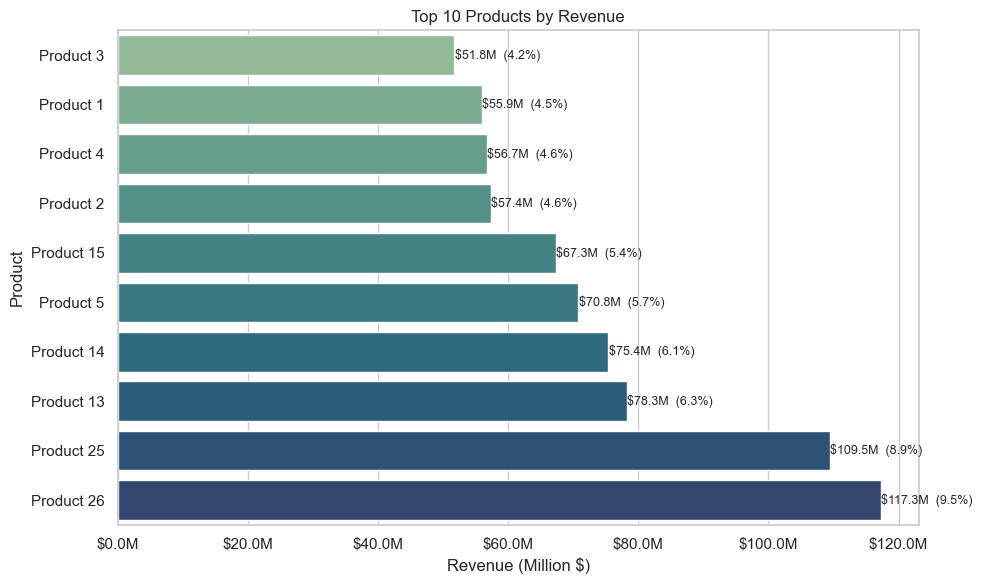

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Top N products by revenue
top_n = 10
prod_rev = (merge_df
            .assign(product_name=merge_df['product_name'].astype(str).str.strip())
            .groupby('product_name', as_index=False)['revenue'].sum()
            .sort_values('revenue', ascending=False)
            .head(top_n))

# For nicer axes/labels
prod_rev = prod_rev.sort_values('revenue', ascending=True).copy()
prod_rev['revenue_m'] = prod_rev['revenue'] / 1e6
total_rev = merge_df['revenue'].sum()
prod_rev['share_pct'] = 100 * prod_rev['revenue'] / total_rev

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
palette = sns.color_palette('crest', n_colors=len(prod_rev))

sns.barplot(
    data=prod_rev,
    x='revenue_m', y='product_name',
    palette=palette, ax=ax
)

# Value labels: $M and share
for p, (_, row) in zip(ax.patches, prod_rev.iterrows()):
    w = p.get_width()
    ax.text(w + 0.05, p.get_y() + p.get_height()/2,
            f'${w:.1f}M  ({row.share_pct:.1f}%)',
            va='center', ha='left', fontsize=9)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:.1f}M'))
ax.set_xlabel('Revenue (Million $)')
ax.set_ylabel('Product')
ax.set_title(f'Top {top_n} Products by Revenue')

plt.tight_layout()
plt.show()


C:\Users\robfr\AppData\Local\Temp\ipykernel_1935364\2190994931.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: 100.0 * g['profit'].sum() / g['revenue'].sum())
C:\Users\robfr\AppData\Local\Temp\ipykernel_1935364\2190994931.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weighted, y='sales_channel', x='weighted_margin',
C:\Users\robfr\AppData\Local\Temp\ipykernel_1935364\2190994931.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue`

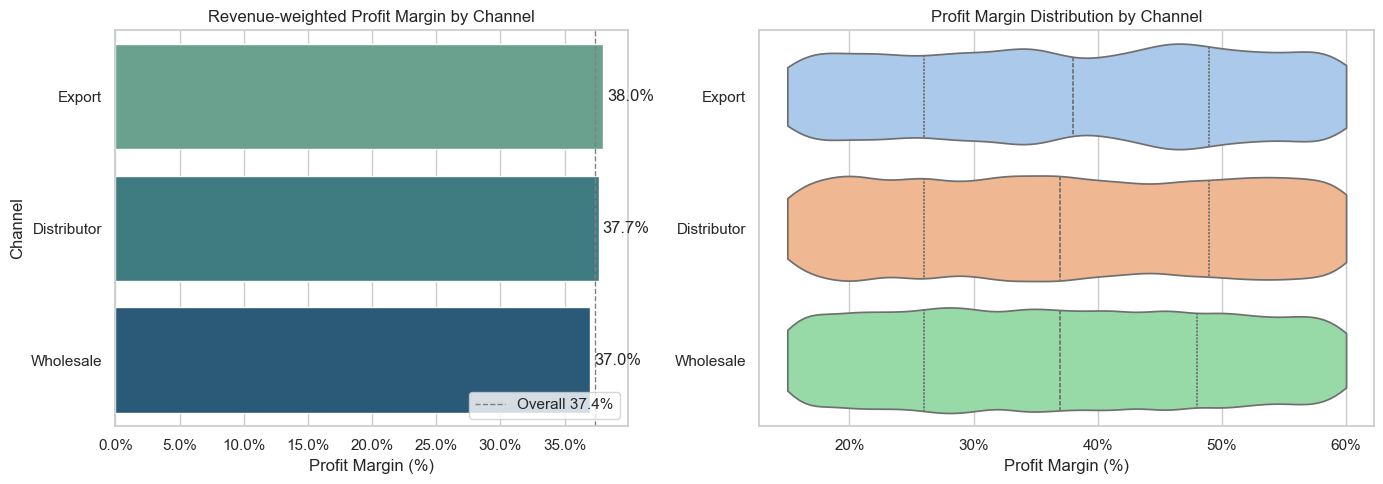

In [332]:
# Profit Margin by Channel
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Prep
df_plot = (merge_df
           .assign(sales_channel=merge_df['sales_channel'].astype(str).str.strip())
           .loc[merge_df['revenue'] > 0, ['sales_channel','profit','revenue','profit_margin_pct']]
           .dropna())

# Revenue-weighted margin per channel
weighted = (df_plot
            .groupby('sales_channel')
            .apply(lambda g: 100.0 * g['profit'].sum() / g['revenue'].sum())
            .reset_index(name='weighted_margin'))

# Sort channels by weighted margin
order = weighted.sort_values('weighted_margin', ascending=False)['sales_channel']
overall_w = 100.0 * df_plot['profit'].sum() / df_plot['revenue'].sum()

# Plot: bar (weighted mean) + violin (distribution)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios':[1,1.2]})

# Left: revenue-weighted margin by channel
sns.barplot(data=weighted, y='sales_channel', x='weighted_margin',
            order=order, palette='crest', ax=axes[0])
axes[0].axvline(overall_w, color='gray', ls='--', lw=1, label=f'Overall {overall_w:.1f}%')
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.1f}%'))
axes[0].set_title('Revenue-weighted Profit Margin by Channel')
axes[0].set_xlabel('Profit Margin (%)')
axes[0].set_ylabel('Channel')
axes[0].legend(loc='lower right')

# Add value labels
for p in axes[0].patches:
    x = p.get_width()
    y = p.get_y() + p.get_height()/2
    axes[0].text(x + 0.3, y, f'{x:.1f}%', va='center')

# Right: distribution of row-level margins
sns.violinplot(data=df_plot, y='sales_channel', x='profit_margin_pct',
               order=order, palette='pastel', cut=0, inner='quartile', ax=axes[1])
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.0f}%'))
axes[1].set_title('Profit Margin Distribution by Channel')
axes[1].set_xlabel('Profit Margin (%)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


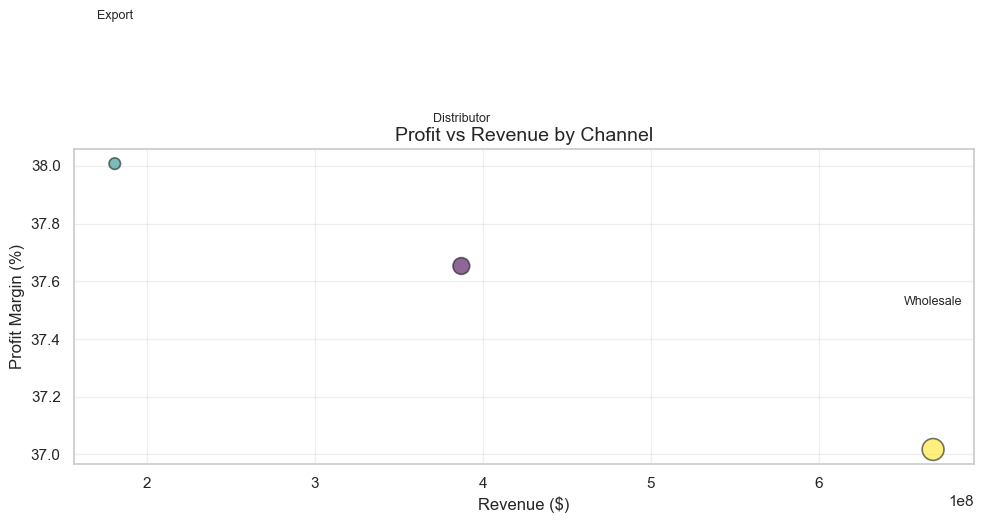

In [346]:
import matplotlib.pyplot as plt

# Aggregate revenue, profit, and profit margin by channel (or product)
bubble_df = (merge_df.groupby("sales_channel")
             .agg({
                 "revenue": "sum",
                 "profit": "sum"
             })
             .reset_index())

# Calculate profit margin %
bubble_df["profit_margin_pct"] = (bubble_df["profit"] / bubble_df["revenue"]) * 100

# Bubble chart
plt.figure(figsize=(10,6))
plt.scatter(
    bubble_df["revenue"], 
    bubble_df["profit_margin_pct"], 
    s=bubble_df["profit"] / 1e6,   # bubble size scaled down
    alpha=0.6, 
    c=range(len(bubble_df)), 
    cmap="viridis", 
    edgecolor="k", 
    linewidth=1.2
)

# Add labels for each channel/product
for i, row in bubble_df.iterrows():
    plt.text(row["revenue"], row["profit_margin_pct"]+0.5, row["sales_channel"], 
             ha="center", fontsize=9)

plt.title("Profit vs Revenue by Channel", fontsize=14)
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("Profit Margin (%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


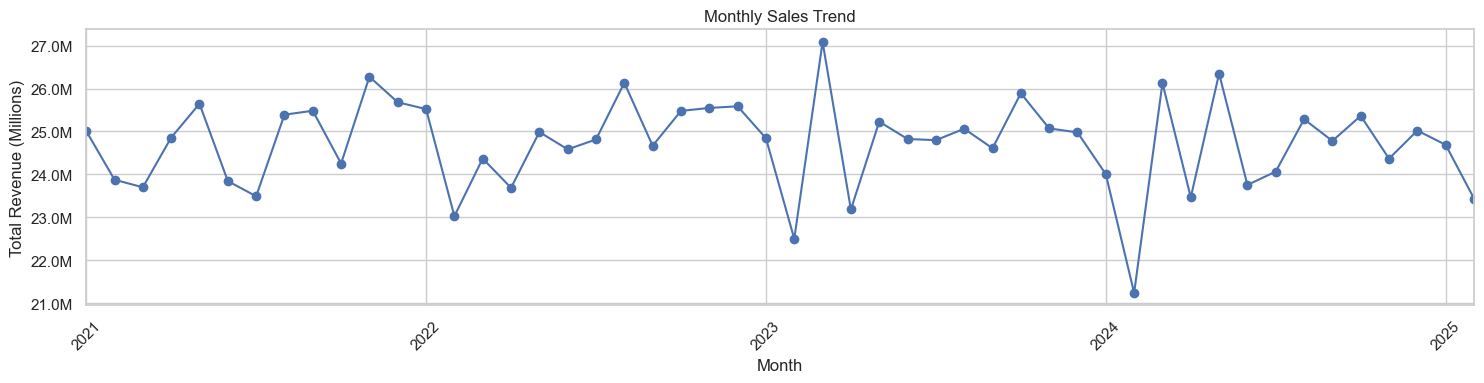

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1) Make sure order_date is datetime
merge_df["order_date"] = pd.to_datetime(merge_df["order_date"], errors="coerce")

# 2) Monthly aggregation (stable, no resample warning)
monthly_sales = (
    merge_df.assign(order_month=merge_df["order_date"].dt.to_period("M"))
            .groupby("order_month")["revenue"]
            .sum()
            .sort_index()
)

# Optional: ensure a continuous monthly index (fill missing months with 0)
monthly_sales = (
    monthly_sales
      .asfreq("M")                        # make it a PeriodIndex with monthly freq
      .fillna(0)
)

# 3) Convert PeriodIndex → Timestamp for clean plotting (month start)
monthly_sales.index = monthly_sales.index.to_timestamp()

# 4) Plot (Matplotlib)
plt.figure(figsize=(15, 4))
monthly_sales.plot(marker="o")            # dots on each month

# Format Y axis in millions
formatter = FuncFormatter(lambda x, pos: f"{x/1e6:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [334]:
# Check the range of dates
print("Min date:", merge_df["order_date"].min())
print("Max date:", merge_df["order_date"].max())

# Inspect anything before 2021
suspect_rows = merge_df[merge_df["order_date"] < "2021-01-01"]
print(suspect_rows[["order_number", "order_date"]])


Min date: 2021-01-01 00:00:00
Max date: 2025-02-28 00:00:00
Empty DataFrame
Columns: [order_number, order_date]
Index: []


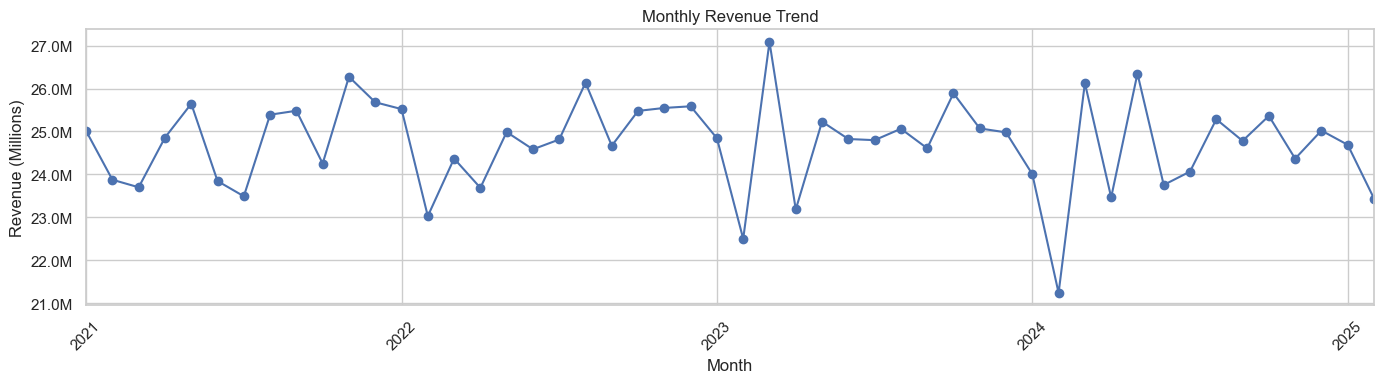

In [335]:
# Monthly Revenue Trend (Line Chart)

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# ensure datetime
merge_df["order_date"] = pd.to_datetime(merge_df["order_date"], errors="coerce")

monthly_rev = (merge_df
               .assign(order_month=merge_df["order_date"].dt.to_period("M"))
               .groupby("order_month")["revenue"].sum()
               .sort_index()
               .asfreq("M")
               .fillna(0))
monthly_rev.index = monthly_rev.index.to_timestamp()

plt.figure(figsize=(14,4))
monthly_rev.plot(marker="o")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x,_: f"{x/1e6:.1f}M"))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month"); plt.ylabel("Revenue (Millions)")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()



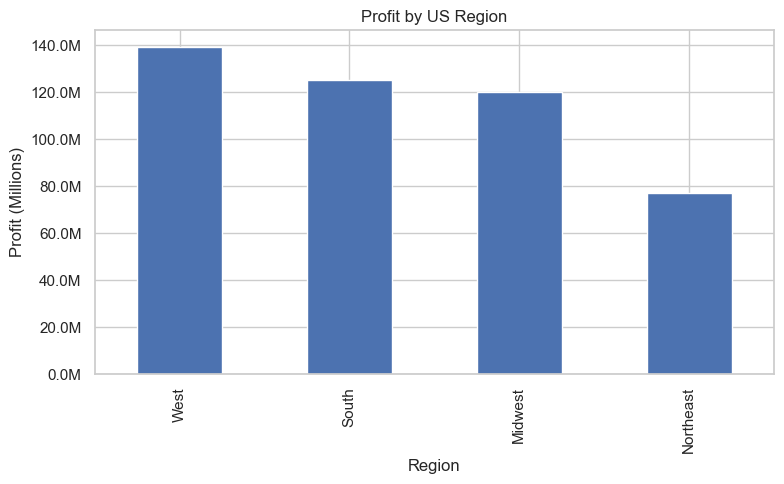

In [336]:
# Profit by US Region (Bar Chart)

from matplotlib.ticker import FuncFormatter

profit_by_region = (merge_df.groupby("us_region")["profit"].sum()
                    .sort_values(ascending=False))

plt.figure(figsize=(8,5))
profit_by_region.plot(kind="bar")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x,_: f"{x/1e6:.1f}M"))
plt.title("Profit by US Region")
plt.xlabel("Region"); plt.ylabel("Profit (Millions)")
plt.tight_layout(); plt.show()



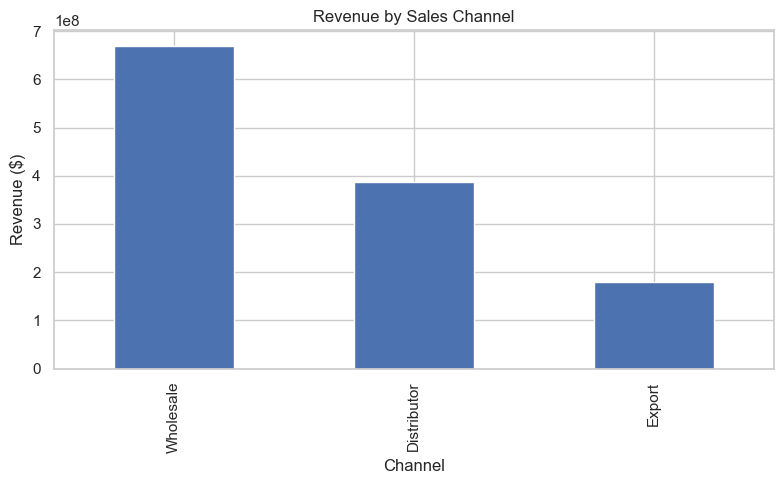

In [338]:
# Revenue by Channel (bar chart)



rev_by_channel = (merge_df.groupby("sales_channel")["revenue"].sum()
                  .sort_values(ascending=False))

plt.figure(figsize=(8,5))
rev_by_channel.plot(kind="bar")
plt.title("Revenue by Sales Channel")
plt.xlabel("Channel"); plt.ylabel("Revenue ($)")
plt.tight_layout(); plt.show()



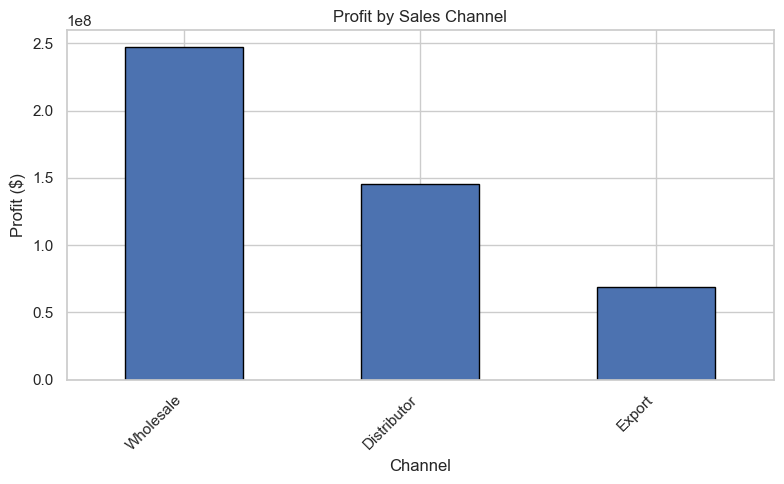

In [347]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1) Pick the channel column you use ---
channel_col = "sales_channel"  # change here if yours is different

# --- 2) Aggregate profit by channel ---
profit_by_channel = (
    merge_df.groupby(channel_col)["profit"]
            .sum()
            .sort_values(ascending=False)
)

# --- 3) Plot ---
plt.figure(figsize=(8,5))
ax = profit_by_channel.plot(kind="bar", edgecolor="black")

plt.title("Profit by Sales Channel")
plt.xlabel("Channel"); plt.ylabel("Profit ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


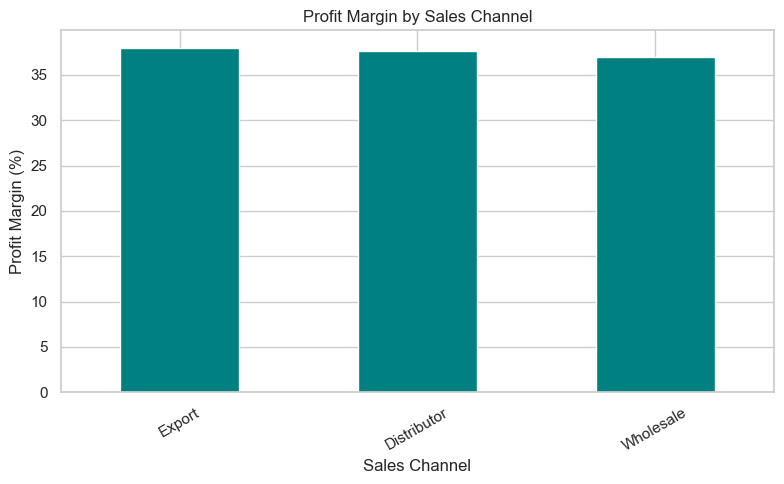

,revenue,profit,profit_margin_pct
sales_channel,,,
Export,180631866.0,6.865458e+07,38.008010
Distributor,387133035.0,1.457679e+08,37.653172
Wholesale,668197244.4,2.473479e+08,37.017197


In [348]:
# Profit margin by channel
profit_margin_by_channel = (
    merge_df.groupby("sales_channel")[["revenue", "profit"]]
    .sum()
    .assign(profit_margin_pct=lambda x: (x["profit"] / x["revenue"]) * 100)
    .sort_values("profit_margin_pct", ascending=False)
)

# Plot
plt.figure(figsize=(8,5))
profit_margin_by_channel["profit_margin_pct"].plot(kind="bar", color="teal")

plt.title("Profit Margin by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Preview table
profit_margin_by_channel


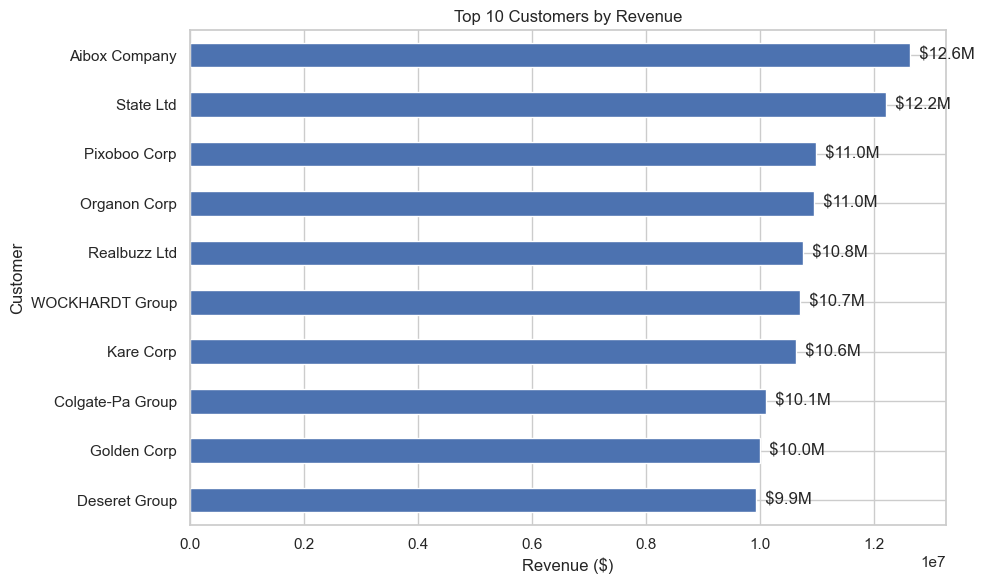

In [ ]:
# Top 10 Customers by Revenue (horizontal bar chart with labels)

top_cust = (merge_df.groupby("customer_name")["revenue"].sum()
            .sort_values(ascending=False).head(10)).sort_values()  # sort for nice hbar

plt.figure(figsize=(10,6))
ax = top_cust.plot(kind="barh")
for i, v in enumerate(top_cust.values):
    ax.text(v, i, f"  ${v/1e6:.1f}M", va="center")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue ($)"); plt.ylabel("Customer")
plt.tight_layout(); plt.show()



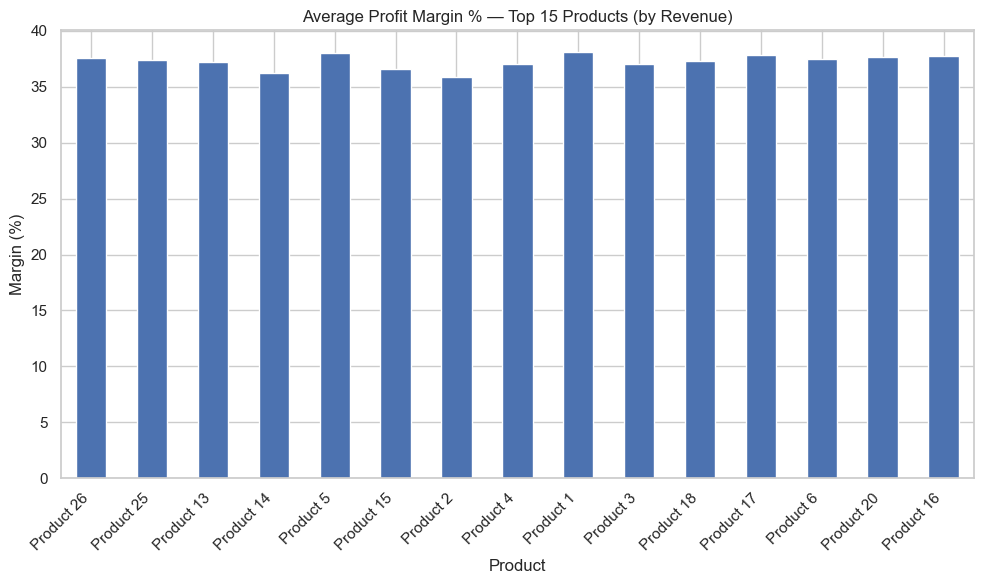

In [ ]:
# Profit Margin by Product (top 15 by revenue)

top_prod = (merge_df.groupby("product_name")
            .agg(revenue=("revenue","sum"),
                 margin=("profit_margin_pct","mean"))
            .sort_values("revenue", ascending=False)
            .head(15))

plt.figure(figsize=(10,6))
ax = top_prod["margin"].plot(kind="bar")
plt.title("Average Profit Margin % — Top 15 Products (by Revenue)")
plt.xlabel("Product"); plt.ylabel("Margin (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()



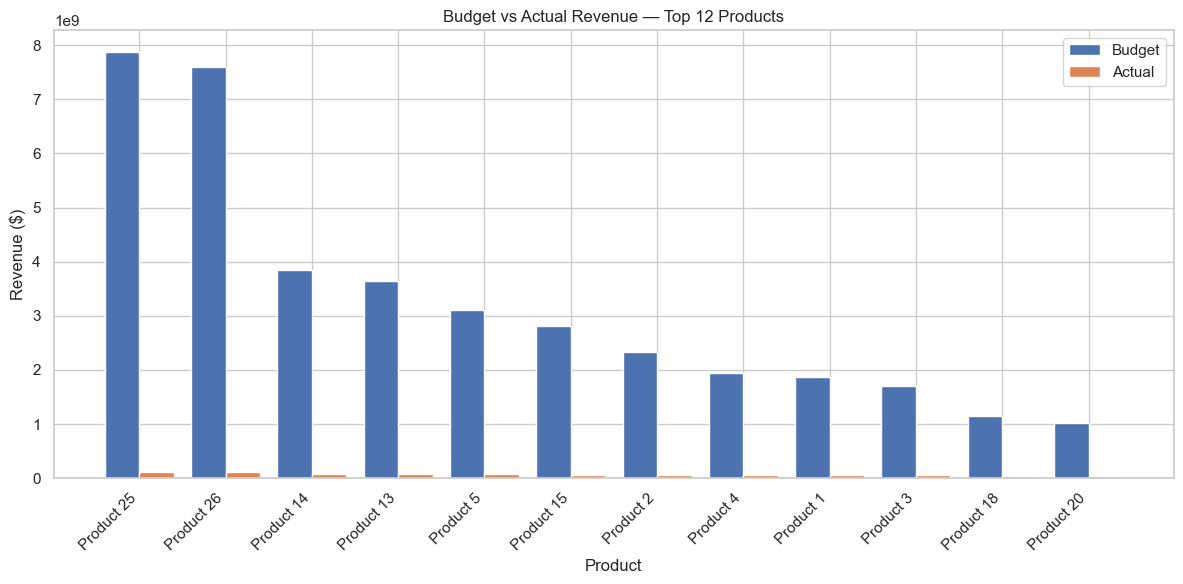

In [ ]:
# Budge vs Actual (clused bars, top 12 products by budget)

# If your budget column is named differently (e.g., '2024_budgets'), change below.
bvA = (merge_df.groupby("product_name")
       .agg(actual=("revenue","sum"),
            budget=("budget","sum"))
       .sort_values("budget", ascending=False)
       .head(12))

x = range(len(bvA))
width = 0.4

plt.figure(figsize=(12,6))
plt.bar([i - width/2 for i in x], bvA["budget"].values, width=width, label="Budget")
plt.bar([i + width/2 for i in x], bvA["actual"].values, width=width, label="Actual")
plt.xticks(x, bvA.index, rotation=45, ha="right")
plt.title("Budget vs Actual Revenue — Top 12 Products")
plt.ylabel("Revenue ($)"); plt.xlabel("Product")
plt.legend()
plt.tight_layout(); plt.show()



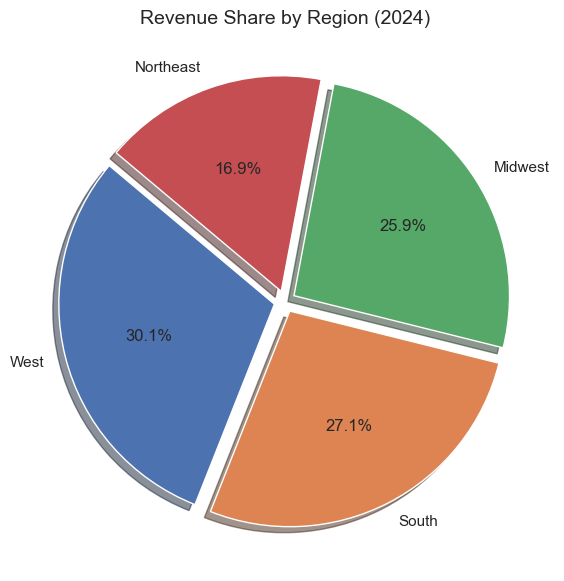

In [339]:
import matplotlib.pyplot as plt

# Aggregate revenue by region
rev_by_region = merge_df.groupby("us_region")["revenue"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(7,7))
plt.pie(
    rev_by_region, 
    labels=rev_by_region.index, 
    autopct="%1.1f%%",    # percentage labels
    startangle=140,       # rotate for nicer layout
    explode=[0.05]*len(rev_by_region),  # pop out all slices slightly
    shadow=True
)

plt.title("Revenue Share by Region (2024)", fontsize=14)
plt.show()


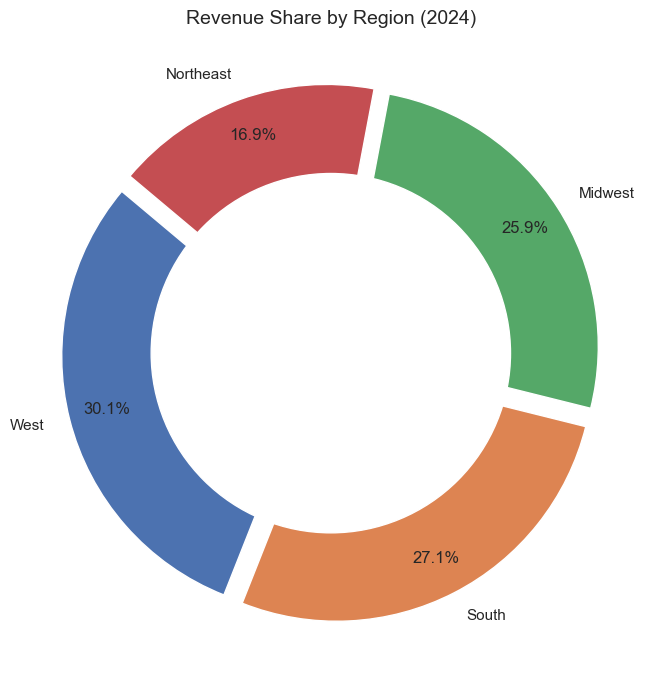

In [340]:
import matplotlib.pyplot as plt

# Aggregate revenue by region
rev_by_region = merge_df.groupby("us_region")["revenue"].sum().sort_values(ascending=False)

# Create pie (donut)
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    rev_by_region,
    labels=rev_by_region.index,
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.85,    # push percentages closer to edge
    explode=[0.05]*len(rev_by_region),  # slightly separate slices
)

# Draw white circle in the middle to make donut
centre_circle = plt.Circle((0,0),0.70,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Style
plt.title("Revenue Share by Region (2024)", fontsize=14)
plt.tight_layout()
plt.show()


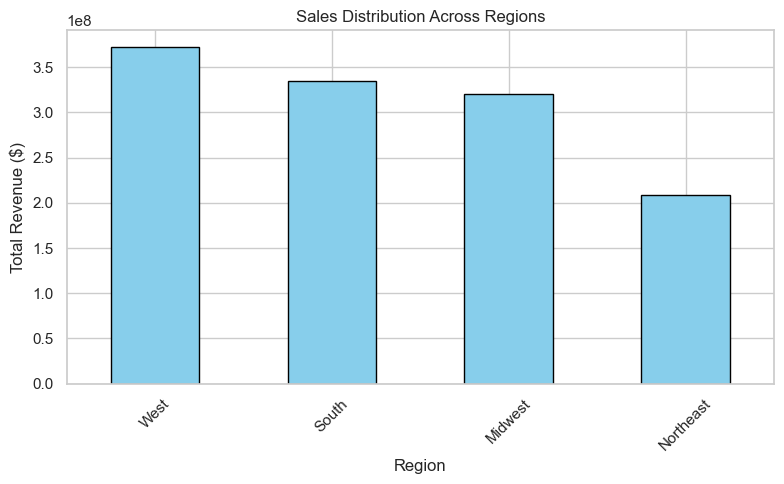

In [341]:
import matplotlib.pyplot as plt

# aggregate total revenue per region
rev_by_region = (merge_df.groupby("us_region")["revenue"]
                 .sum()
                 .sort_values(ascending=False))

plt.figure(figsize=(8,5))
rev_by_region.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Sales Distribution Across Regions")
plt.xlabel("Region"); plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


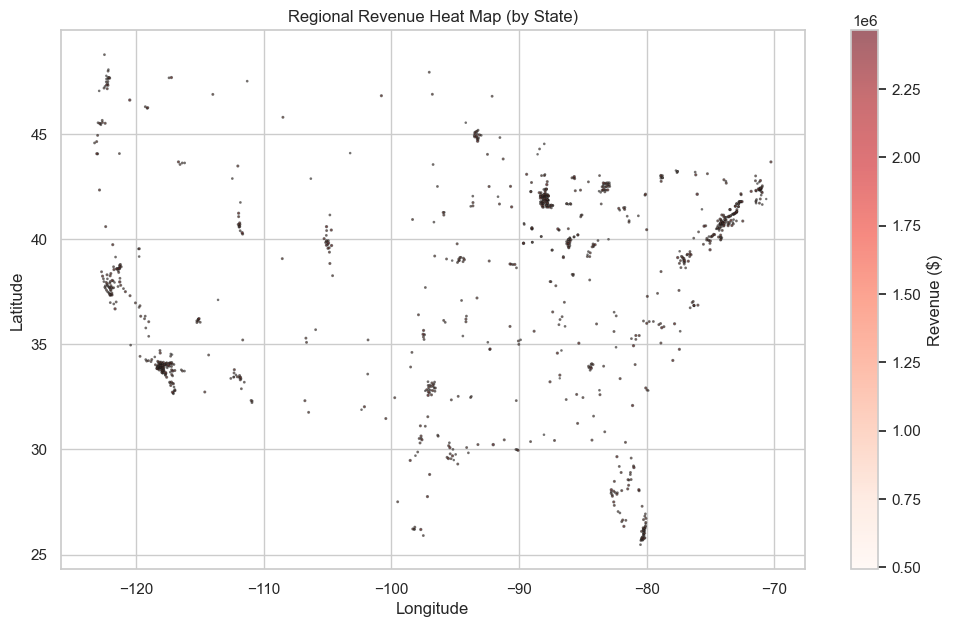

In [342]:
import matplotlib.pyplot as plt

# aggregate revenue by state (or region, depending on granularity you want)
state_rev = merge_df.groupby("state")["revenue"].sum().reset_index()

# merge back lat/lon info (assuming your merge_df has it already)
heat_df = merge_df.groupby(["state_name", "lat", "lon"])["revenue"].sum().reset_index()

plt.figure(figsize=(12,7))
scatter = plt.scatter(
    heat_df["lon"], heat_df["lat"],
    c=heat_df["revenue"], cmap="Reds", s=heat_df["revenue"] / 1e6, alpha=0.6, edgecolor="k"
)
plt.colorbar(scatter, label="Revenue ($)")
plt.title("Regional Revenue Heat Map (by State)")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()


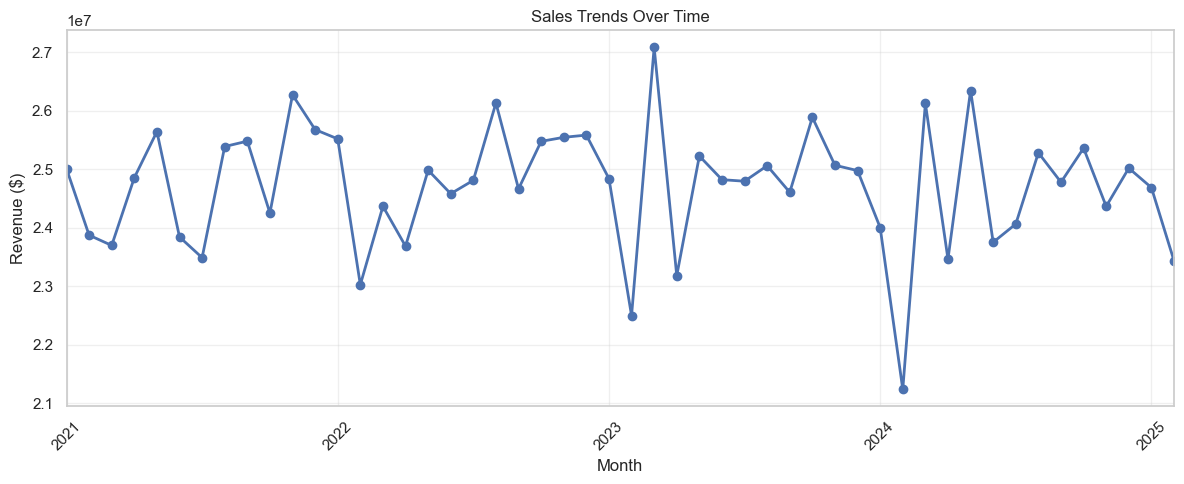

In [343]:
import matplotlib.pyplot as plt
import pandas as pd

# ensure datetime
merge_df["order_date"] = pd.to_datetime(merge_df["order_date"], errors="coerce")

monthly_sales = (merge_df
                 .assign(order_month=merge_df["order_date"].dt.to_period("M"))
                 .groupby("order_month")["revenue"].sum()
                 .sort_index())

monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,5))
monthly_sales.plot(marker="o", linewidth=2)
plt.title("Sales Trends Over Time")
plt.xlabel("Month"); plt.ylabel("Revenue ($)")
plt.xticks(rotation=45); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


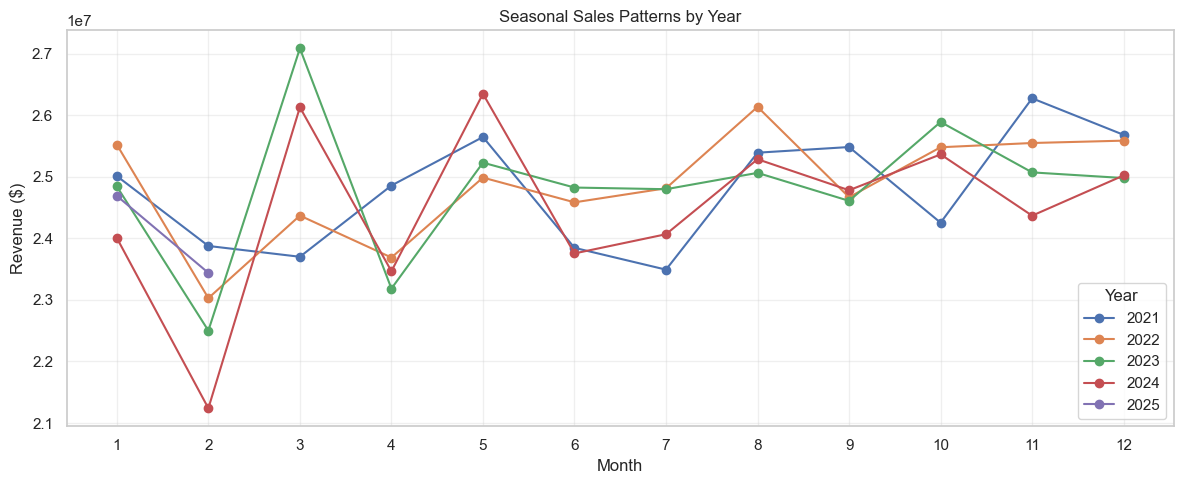

In [344]:
# extract year-month for grouping
merge_df["year"] = merge_df["order_date"].dt.year
merge_df["month"] = merge_df["order_date"].dt.month

seasonal_sales = (merge_df.groupby(["year","month"])["revenue"].sum()
                  .reset_index())

plt.figure(figsize=(12,5))
for yr, data in seasonal_sales.groupby("year"):
    plt.plot(data["month"], data["revenue"], marker="o", label=str(yr))

plt.title("Seasonal Sales Patterns by Year")
plt.xlabel("Month"); plt.ylabel("Revenue ($)")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


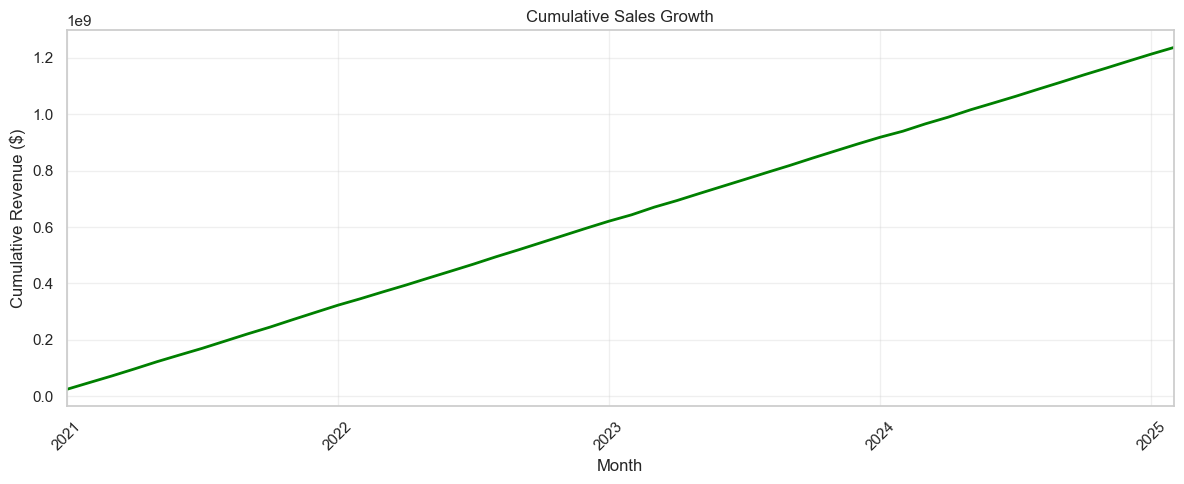

In [345]:
cumulative_sales = (monthly_sales.cumsum())

plt.figure(figsize=(12,5))
cumulative_sales.plot(linewidth=2, color="green")
plt.title("Cumulative Sales Growth")
plt.xlabel("Month"); plt.ylabel("Cumulative Revenue ($)")
plt.xticks(rotation=45); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


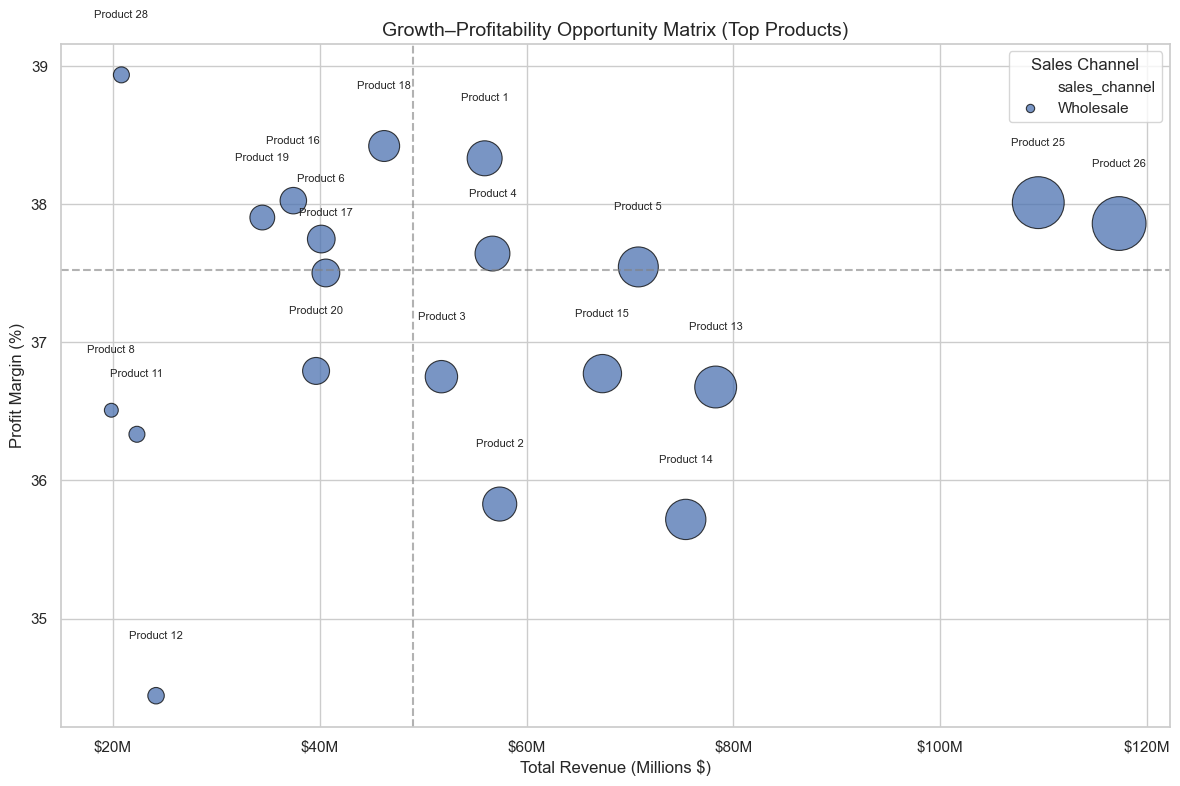

In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ==== 1) Prep ====
df = merge_df.copy()
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["year"] = df["order_date"].dt.year

# revenue & profit by product & year
yr = (df.groupby(["product_name","year"])
        .agg(revenue=("revenue","sum"), profit=("profit","sum"))
        .reset_index())

# total across all years (scale + efficiency)
tot = (yr.groupby("product_name")
         .agg(total_revenue=("revenue","sum"),
              total_profit=("profit","sum"))
         .reset_index())
tot["margin_pct"] = (tot["total_profit"] / tot["total_revenue"]) * 100

# pick a growth metric: CAGR from first to last year available
first = yr.sort_values("year").groupby("product_name").first().reset_index()
last  = yr.sort_values("year").groupby("product_name").last().reset_index()

g = (first[["product_name","year","revenue"]]
       .merge(last[["product_name","year","revenue"]],
              on="product_name", suffixes=("_first","_last")))
g["years"] = (g["year_last"] - g["year_first"]).clip(lower=1)
g["cagr_pct"] = np.where(
    (g["revenue_first"]>0) & (g["revenue_last"]>0),
    ( (g["revenue_last"] / g["revenue_first"]) ** (1/g["years"]) - 1 ) * 100,
    np.nan
)

# bring in a lens for color (choose ONE)
lens = df.groupby("product_name").agg(
    sales_channel=("sales_channel", lambda x: x.value_counts().idxmax()),
    us_region=("us_region", lambda x: x.value_counts().idxmax())
).reset_index()

final = (tot.merge(g[["product_name","cagr_pct"]], on="product_name", how="left")
            .merge(lens, on="product_name", how="left"))

# focus on the biggest players
topN = (final.sort_values("total_revenue", ascending=False)
              .head(20)
              .copy())

# ==== 2) Plot ====
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))

# choose hue_col = "sales_channel" or "us_region"
hue_col = "sales_channel"

ax = sns.scatterplot(
    data=topN,
    x="total_revenue",
    y="margin_pct",
    size="total_profit",
    hue=hue_col,
    sizes=(100, 1500),
    alpha=0.75,
    edgecolor="black",
    linewidth=0.8
)

# format axes (millions + percent)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${x/1e6:.0f}M"))
ax.set_xlabel("Total Revenue (Millions $)")
ax.set_ylabel("Profit Margin (%)")
plt.title("Growth–Profitability Opportunity Matrix (Top Products)", fontsize=14)

# quadrant guides (use medians)
x_med = topN["total_revenue"].median()
y_med = topN["margin_pct"].median()
plt.axvline(x_med, color="gray", linestyle="--", alpha=0.6)
plt.axhline(y_med, color="gray", linestyle="--", alpha=0.6)

# annotate points with product names
for _, r in topN.iterrows():
    plt.text(r["total_revenue"], r["margin_pct"]+0.4, r["product_name"],
             ha="center", va="bottom", fontsize=8)

# optional: colorbar for bubble size off; legend tidy
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:1+len(topN[hue_col].unique())],  # hue legend only
           labels[:1+len(topN[hue_col].unique())],
           title=hue_col.replace("_"," ").title(),
           frameon=True)

plt.tight_layout()
plt.show()


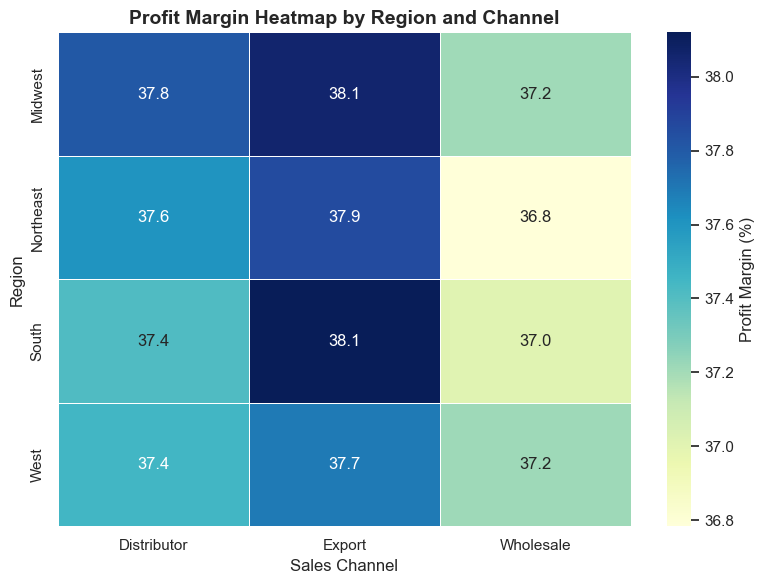

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data: rows = region, columns = sales_channel, values = avg profit margin
heatmap_data = (merge_df
    .groupby(["us_region", "sales_channel"])["profit_margin_pct"]
    .mean()
    .reset_index()
    .pivot(index="us_region", columns="sales_channel", values="profit_margin_pct")
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data, 
    annot=True, fmt=".1f", cmap="YlGnBu", 
    linewidths=.5, cbar_kws={"label": "Profit Margin (%)"}
)

plt.title("Profit Margin Heatmap by Region and Channel", fontsize=14, weight="bold")
plt.ylabel("Region")
plt.xlabel("Sales Channel")
plt.tight_layout()
plt.show()


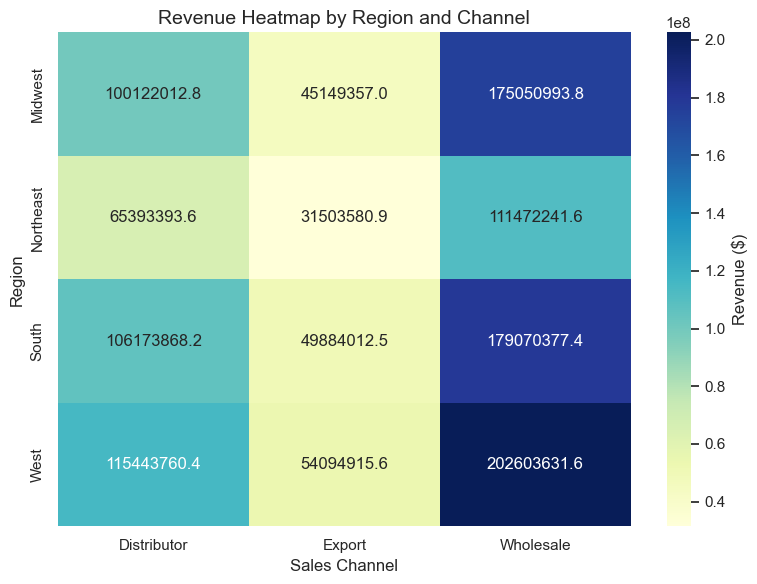

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a region x channel matrix of revenue
rev_pivot = merge_df.pivot_table(
    index="us_region", 
    columns="sales_channel", 
    values="revenue", 
    aggfunc="sum"
)

plt.figure(figsize=(8,6))
sns.heatmap(
    rev_pivot, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Revenue ($)'}
)

plt.title("Revenue Heatmap by Region and Channel", fontsize=14)
plt.xlabel("Sales Channel")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


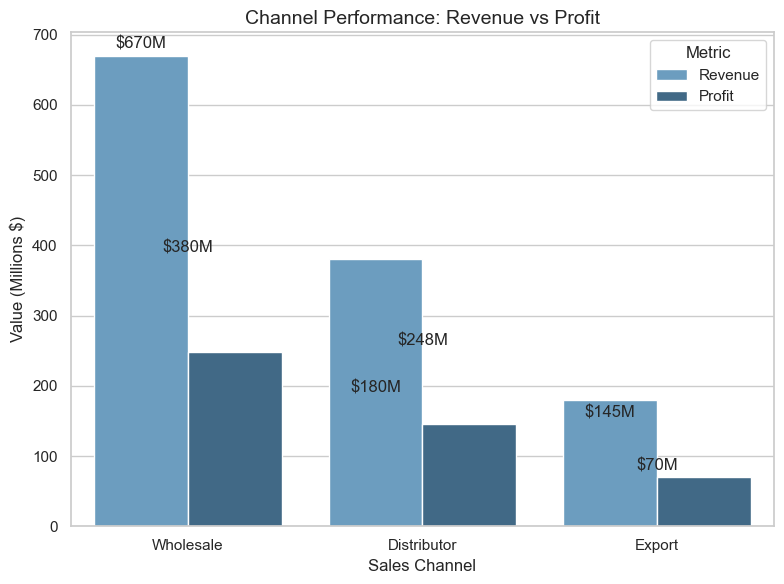

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Channel performance data
data = {
    "Channel": ["Wholesale", "Distributor", "Export"],
    "Revenue": [670, 380, 180],   # in Millions
    "Profit": [248, 145, 70]      # in Millions
}
df = pd.DataFrame(data)

# Melt data for grouped bar plot
df_melt = df.melt(id_vars="Channel", value_vars=["Revenue", "Profit"], 
                  var_name="Metric", value_name="Value")

plt.figure(figsize=(8,6))
sns.barplot(data=df_melt, x="Channel", y="Value", hue="Metric", palette="Blues_d")

# Add labels
for i, row in df_melt.iterrows():
    plt.text(i//2 + (i%2)*0.2 - 0.2, row.Value + 10, f"${row.Value}M", ha="center")

plt.title("Channel Performance: Revenue vs Profit", fontsize=14)
plt.ylabel("Value (Millions $)")
plt.xlabel("Sales Channel")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()
